In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('../data/1200-1399/game.csv')
df.head()

Event                Site      White     Black  \
0  FICS rated standard game  FICS freechess.org  edclaudio    edinei   
1     FICS rated blitz game  FICS freechess.org   grivnash     Gotbe   
2     FICS rated blitz game  FICS freechess.org   MARYROLL   eklavya   
3     FICS rated blitz game  FICS freechess.org      salth      LTVT   
4     FICS rated blitz game  FICS freechess.org    eklavya  MARYROLL   

   WhiteElo  BlackElo TimeControl        Date  ECO  PlyCount Result  \
0      1370      1345     3600+30  2020.05.12  C41       165    1-0   
1      1243      1232       600+0  2020.05.12  D00        76    0-1   
2      1367      1349       180+0  2020.05.12  B30        86    0-1   
3      1245      1388       180+0  2020.05.12  C25        52    0-1   
4      1357      1359       180+0  2020.05.12  B00        76    0-1   

                                           Movements  
0  1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 N...  
1  1. d4 d5 2. e3 Nf6 3. c4 e6 4. c5 c6 5. Nc3 b6...  
2  1. e4 c5 2. Nf3 Nc6 3. a3 e6 4. Nc3 Qb6 5. d3 ...  
3  1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 ...  
4  1. e4 e5 2. d4 Nc6 3. d5 Nb4 4. a3 Na6 5. Nf3 ...

In [3]:
movements = df['Movements']

In [4]:
movements[0]

'1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 Nf6 6. d3 Qe7 7. Ne2 Be6 8. Bxe6 Qxe6 9. O-O Nbd7 10. a3 Be7 11. Ng3 g6 12. Be3 d5 13. Qc1 Bf8 14. b4 O-O-O 15. a4 Bxb4 16. Qb2 Qd6 17. Rab1 a5 18. c3 c5 19. cxb4 axb4 20. a5 Kc7 21. Ne2 d4 22. Bc1 Ra8 23. Ra1 Nb8 24. Bd2 Nc6 25. Qb3 Rhf8 26. Qc2 Kd7 27. Qc4 Nxa5 28. Qb5+ Qc6 29. Qxc6+ Nxc6 30. Bxh6 Rg8 31. Bg5 Na5 32. Bxf6 b3 33. Bg5 Rge8 34. Bd2 b2 35. Ra2 c4 36. Rxb2 cxd3 37. Ng3 Nc4 38. Rxb7+ Kc6 39. Rxf7 Red8 40. Rf6+ Rd6 41. Rxd6+ Kxd6 42. Bb4+ Kc6 43. Rc1 Kb5 44. Be7 d2 45. Rd1 Ra2 46. Bg5 Nb2 47. Rxd2 Ra1+ 48. Kh2 Rb1 49. Nxe5 Na4 50. Rxd4 Nc3 51. Rd6 Nd1 52. Nd7 Kc4 53. e5 Nxf2 54. e6 Re1 55. Nf8 Nd3 56. e7 Nc5 57. Rd8 Nb7 58. Rc8+ Kd5 59. e8=Q Rxe8 60. Rd8+ Nxd8 61. Nxg6 Nf7 62. Bd2 Nd6 63. Nh5 Ne4 64. Bc1 Kc4 65. Nhf4 Ng5 66. Ne2 Rxe2 67. Bxg5 Kc3 68. Kg3 Kc2 69. Kf3 Kd1 70. Nf4 Ra2 71. g3 Ra3+ 72. Kg4 Ke1 73. h4 Kf2 74. Nh5 Kg2 75. Bf4 Ra8 76. Nf6 Rf8 77. Kg5 Ra8 78. h5 Ra5+ 79. Kg6 Ra8 80. h6 Rh8 81. h7 Rxh7 82. Kxh7 Kf3 83. Be

In [11]:
# parsing the game movement string
import re

In [12]:
'''
clarifying some notations in the string

K: King
Q: Queen
R: Rook
B: Bishop
N: Knight
P: Pawn (although, by convention, P is usually omitted from notation)

Special Symbols

x: captures
0-0: kingside castle
0-0-0: queenside castle
+: check
#: checkmate
!: good move
?: poor move
more !s and ?s can be added for emphasis.

e4: means a pawn was moved to e4 (no Capital letter means it was a pawn)
Nf3: Knight was moved to f3
Bc4: Bishop moved to c4
Qe7: Queen to e7
Bxe6: Bishop caputred the piece on e6 ("x" refers to capturing a piece)
Rf6+: Rook to f6, this move was a check to the opponent's king
O-O: a king side castling
O-O-O: a queen side castling
e8=Q: pawn to e8, promotion to Queen ("=" refers to pawn promotion followed by the choice of piece)
Qh5#: Queen to h5, a checkmate ("#" refers to a checkmate)
'''

'\nclarifying some notations in the string\n\nK: King\nQ: Queen\nR: Rook\nB: Bishop\nN: Knight\nP: Pawn (although, by convention, P is usually omitted from notation)\n\nSpecial Symbols\n\nx: captures\n0-0: kingside castle\n0-0-0: queenside castle\n+: check\n#: checkmate\n!: good move\n?: poor move\nmore !s and ?s can be added for emphasis.\n\ne4: means a pawn was moved to e4 (no Capital letter means it was a pawn)\nNf3: Knight was moved to f3\nBc4: Bishop moved to c4\nQe7: Queen to e7\nBxe6: Bishop caputred the piece on e6 ("x" refers to capturing a piece)\nRf6+: Rook to f6, this move was a check to the opponent\'s king\nO-O: a king side castling\nO-O-O: a queen side castling\ne8=Q: pawn to e8, promotion to Queen ("=" refers to pawn promotion followed by the choice of piece)\nQh5#: Queen to h5, a checkmate ("#" refers to a checkmate)\n'

In [13]:
def parse_movement_to_player_moves(movement_string, side):
    # split the game into individual turns
    split = re.split('[0-9]+\.', movement_string)
    # strip white spaces and the last move
    moves = list(map(lambda v: v.strip(), split))
    last_move = moves[-1]
    moves = moves[1:-1]
    white_black_moves = list(map(lambda v: v.split(" "), moves))
    if side == 'White':
        return [move[0] for move in white_black_moves]
    else:
        return [move[1] for move in white_black_moves]

In [14]:
df['WhiteMoves'] = df['Movements'].transform(parse_movement_to_player_moves, side='White')
df['BlackMoves'] = df['Movements'].transform(parse_movement_to_player_moves, side='Black')

In [15]:
df.head()

Event                Site      White     Black  \
0  FICS rated standard game  FICS freechess.org  edclaudio    edinei   
1     FICS rated blitz game  FICS freechess.org   grivnash     Gotbe   
2     FICS rated blitz game  FICS freechess.org   MARYROLL   eklavya   
3     FICS rated blitz game  FICS freechess.org      salth      LTVT   
4     FICS rated blitz game  FICS freechess.org    eklavya  MARYROLL   

   WhiteElo  BlackElo TimeControl        Date  ECO  PlyCount Result  \
0      1370      1345     3600+30  2020.05.12  C41       165    1-0   
1      1243      1232       600+0  2020.05.12  D00        76    0-1   
2      1367      1349       180+0  2020.05.12  B30        86    0-1   
3      1245      1388       180+0  2020.05.12  C25        52    0-1   
4      1357      1359       180+0  2020.05.12  B00        76    0-1   

                                           Movements  \
0  1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 N...   
1  1. d4 d5 2. e3 Nf6 3. c4 e6 4. c5 c6 5. Nc3 b6...   
2  1. e4 c5 2. Nf3 Nc6 3. a3 e6 4. Nc3 Qb6 5. d3 ...   
3  1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 ...   
4  1. e4 e5 2. d4 Nc6 3. d5 Nb4 4. a3 Na6 5. Nf3 ...   

                                          WhiteMoves  \
0  [e4, Nf3, h3, Bc4, Nc3, d3, Ne2, Bxe6, O-O, a3...   
1  [d4, e3, c4, c5, Nc3, b4, Nf3, Nxb5, Nd6+, cxd...   
2  [e4, Nf3, a3, Nc3, d3, Be2, O-O, e5, h3, Nxe5,...   
3  [e4, Nc3, a3, Bc4, d3, Nge2, O-O, f4, Nxf4, Be...   
4  [e4, d4, d5, a3, Nf3, Nc3, Be2, Bxf3, O-O, Re1...   

                                          BlackMoves  
0  [e5, d6, c6, h6, Nf6, Qe7, Be6, Qxe6, Nbd7, Be...  
1  [d5, Nf6, e6, c6, b6, b5, a5, axb4, Bxd6, Qxd6...  
2  [c5, Nc6, e6, Qb6, g6, Nf6, Bg7, Ng4, Ngxe5, N...  
3  [e5, Nc6, d6, Nf6, Nd4, Be7, O-O, exf4, c5, Bg...  
4  [e5, Nc6, Nb4, Na6, d6, Bg4, Bxf3, Nf6, Nc5, Q...

In [16]:
def getNumberOfPieceMoves(moves, piece):
    count = 0
    for move in moves:
        if piece == 'P':
            if move[0].islower():
                count += 1
        else:
            if move[0] == piece:
                count += 1
    return count

In [17]:
df['PawnMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='P')
df['KnightMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='N')
df['BishopMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='B')
df['RookMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='R')
df['QueenMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='Q')
df['KingMoveCount_White'] = df['WhiteMoves'].transform(getNumberOfPieceMoves, piece='K')

In [18]:
df.head()

Event                Site      White     Black  \
0  FICS rated standard game  FICS freechess.org  edclaudio    edinei   
1     FICS rated blitz game  FICS freechess.org   grivnash     Gotbe   
2     FICS rated blitz game  FICS freechess.org   MARYROLL   eklavya   
3     FICS rated blitz game  FICS freechess.org      salth      LTVT   
4     FICS rated blitz game  FICS freechess.org    eklavya  MARYROLL   

   WhiteElo  BlackElo TimeControl        Date  ECO  PlyCount Result  \
0      1370      1345     3600+30  2020.05.12  C41       165    1-0   
1      1243      1232       600+0  2020.05.12  D00        76    0-1   
2      1367      1349       180+0  2020.05.12  B30        86    0-1   
3      1245      1388       180+0  2020.05.12  C25        52    0-1   
4      1357      1359       180+0  2020.05.12  B00        76    0-1   

                                           Movements  \
0  1. e4 e5 2. Nf3 d6 3. h3 c6 4. Bc4 h6 5. Nc3 N...   
1  1. d4 d5 2. e3 Nf6 3. c4 e6 4. c5 c6 5. Nc3 b6...   
2  1. e4 c5 2. Nf3 Nc6 3. a3 e6 4. Nc3 Qb6 5. d3 ...   
3  1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 ...   
4  1. e4 e5 2. d4 Nc6 3. d5 Nb4 4. a3 Na6 5. Nf3 ...   

                                          WhiteMoves  \
0  [e4, Nf3, h3, Bc4, Nc3, d3, Ne2, Bxe6, O-O, a3...   
1  [d4, e3, c4, c5, Nc3, b4, Nf3, Nxb5, Nd6+, cxd...   
2  [e4, Nf3, a3, Nc3, d3, Be2, O-O, e5, h3, Nxe5,...   
3  [e4, Nc3, a3, Bc4, d3, Nge2, O-O, f4, Nxf4, Be...   
4  [e4, d4, d5, a3, Nf3, Nc3, Be2, Bxf3, O-O, Re1...   

                                          BlackMoves  PawnMoveCount_White  \
0  [e5, d6, c6, h6, Nf6, Qe7, Be6, Qxe6, Nbd7, Be...                   18   
1  [d5, Nf6, e6, c6, b6, b5, a5, axb4, Bxd6, Qxd6...                   11   
2  [c5, Nc6, e6, Qb6, g6, Nf6, Bg7, Ng4, Ngxe5, N...                   10   
3  [e5, Nc6, d6, Nf6, Nd4, Be7, O-O, exf4, c5, Bg...                    5   
4  [e5, Nc6, Nb4, Na6, d6, Bg4, Bxf3, Nf6, Nc5, Q...                   14   

   KnightMoveCount_White  BishopMoveCount_White  RookMoveCount_White  \
0                     16                     17                   16   
1                      9                      5                    4   
2                      8                      7                    1   
3                      6                      7                    1   
4                      9                      7                    4   

   QueenMoveCount_White  KingMoveCount_White  
0                     7                    7  
1                     5                    2  
2                    13                    2  
3                     5                    0  
4                     2                    0

In [19]:
df.describe()

WhiteElo     BlackElo     PlyCount  PawnMoveCount_White  \
count  4972.000000  4972.000000  4972.000000          4972.000000   
mean   1312.182019  1312.518906    69.606798             9.587490   
std      54.728088    54.516568    31.195293             4.182012   
min    1200.000000  1200.000000     1.000000             0.000000   
25%    1268.000000  1269.000000    48.000000             7.000000   
50%    1317.000000  1318.000000    66.000000             9.000000   
75%    1360.000000  1359.000000    88.000000            12.000000   
max    1399.000000  1399.000000   259.000000            27.000000   

       KnightMoveCount_White  BishopMoveCount_White  RookMoveCount_White  \
count            4972.000000            4972.000000          4972.000000   
mean                6.118665               5.315768             4.879324   
std                 3.620556               2.937156             5.152270   
min                 0.000000               0.000000             0.000000   
25%                 4.000000               3.000000             1.000000   
50%                 5.000000               5.000000             4.000000   
75%                 8.000000               7.000000             7.000000   
max                61.000000              25.000000            48.000000   

       QueenMoveCount_White  KingMoveCount_White  
count           4972.000000          4972.000000  
mean               4.161102             3.162711  
std                3.683789             5.077856  
min                0.000000             0.000000  
25%                2.000000             0.000000  
50%                3.000000             1.000000  
75%                6.000000             4.000000  
max               45.000000            56.000000

In [21]:
'''
however, since there may be longer games compared to shorter games (and higher tier players may tend to have longer games because both players are skilled, so instead of counting the movements, it would be more beneficial to
standardize the values into ratios). i.e. how often does the user move a Knight piece relative to other pieces?
'''
print('play count:', df.iloc[3].PlyCount)
print('moves:', df.iloc[3].Movements)

play count: 52
moves: 1. e4 e5 2. Nc3 Nc6 3. a3 d6 4. Bc4 Nf6 5. d3 Nd4 6. Nge2 Be7 7. O-O O-O 8. f4 exf4 9. Nxf4 c5 10. Be3 Bg4 11. Qd2 a6 12. h3 Bh5 13. Nxh5 Nxh5 14. Bxd4 cxd4 15. Ne2 Bf6 16. Qe1 Be5 17. Qf2 Qg5 18. Bxf7+ Kh8 19. Qe1 Nf6 20. Bb3 b5 21. Rf3 Rac8 22. Ng3 a5 23. Qf2 a4 24. Ba2 b4 25. Bc4 b3 26. cxb3 axb3 {White forfeits on time} 0-1


In [22]:
'''
as you can see, the PlyCount counts turns individually (so white move then black move = 2 PlyCount)
I think it's fine to just divide that by 2 to get 'TurnCount'.
'''
df['TurnCount'] = df['PlyCount']/2

In [23]:
df['PawnMovePercentage_White'] = df['PawnMoveCount_White'] / df['TurnCount']
df['KnightMovePercentage_White'] = df['KnightMoveCount_White'] / df['TurnCount']
df['BishopMovePercentage_White'] = df['BishopMoveCount_White'] / df['TurnCount']
df['RookMovePercentage_White'] = df['RookMoveCount_White'] / df['TurnCount']
df['QueenMovePercentage_White'] = df['QueenMoveCount_White'] / df['TurnCount']
df['KingMovePercentage_White'] = df['KingMoveCount_White'] / df['TurnCount']

In [24]:
df.describe()

WhiteElo     BlackElo     PlyCount  PawnMoveCount_White  \
count  4972.000000  4972.000000  4972.000000          4972.000000   
mean   1312.182019  1312.518906    69.606798             9.587490   
std      54.728088    54.516568    31.195293             4.182012   
min    1200.000000  1200.000000     1.000000             0.000000   
25%    1268.000000  1269.000000    48.000000             7.000000   
50%    1317.000000  1318.000000    66.000000             9.000000   
75%    1360.000000  1359.000000    88.000000            12.000000   
max    1399.000000  1399.000000   259.000000            27.000000   

       KnightMoveCount_White  BishopMoveCount_White  RookMoveCount_White  \
count            4972.000000            4972.000000          4972.000000   
mean                6.118665               5.315768             4.879324   
std                 3.620556               2.937156             5.152270   
min                 0.000000               0.000000             0.000000   
25%                 4.000000               3.000000             1.000000   
50%                 5.000000               5.000000             4.000000   
75%                 8.000000               7.000000             7.000000   
max                61.000000              25.000000            48.000000   

       QueenMoveCount_White  KingMoveCount_White    TurnCount  \
count           4972.000000          4972.000000  4972.000000   
mean               4.161102             3.162711    34.803399   
std                3.683789             5.077856    15.597647   
min                0.000000             0.000000     0.500000   
25%                2.000000             0.000000    24.000000   
50%                3.000000             1.000000    33.000000   
75%                6.000000             4.000000    44.000000   
max               45.000000            56.000000   129.500000   

       PawnMovePercentage_White  KnightMovePercentage_White  \
count               4972.000000                 4972.000000   
mean                   0.289279                    0.186107   
std                    0.091512                    0.087233   
min                    0.000000                    0.000000   
25%                    0.228571                    0.123077   
50%                    0.281250                    0.177215   
75%                    0.338983                    0.239177   
max                    0.888889                    0.600000   

       BishopMovePercentage_White  RookMovePercentage_White  \
count                 4972.000000               4972.000000   
mean                     0.160976                  0.117337   
std                      0.074760                  0.092490   
min                      0.000000                  0.000000   
25%                      0.107143                  0.047619   
50%                      0.153846                  0.103896   
75%                      0.206897                  0.171429   
max                      0.571429                  0.542056   

       QueenMovePercentage_White  KingMovePercentage_White  
count                4972.000000               4972.000000  
mean                    0.118622                  0.066687  
std                     0.087429                  0.084212  
min                     0.000000                  0.000000  
25%                     0.052632                  0.000000  
50%                     0.103448                  0.035714  
75%                     0.170343                  0.102564  
max                     0.634146                  0.615385

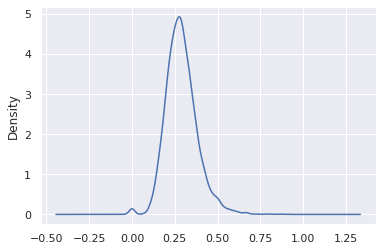

In [117]:
# checking the distribution pawn movement ratio
df['PawnMovePercentage_White'].plot.kde()

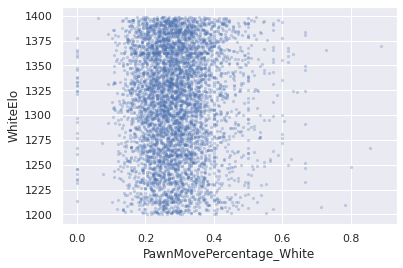

In [118]:
sns.scatterplot(
    x=df['PawnMovePercentage_White'],
    y=df['WhiteElo'],
    alpha=0.3,
    s=10,
    linewidth=0
)

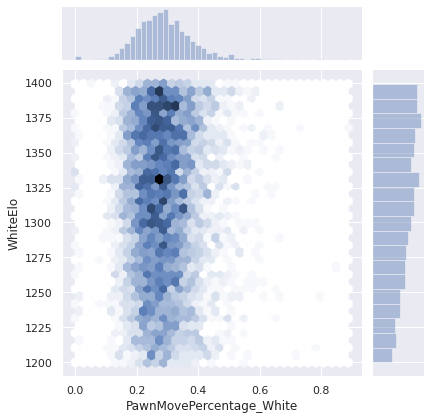

In [119]:
sns.jointplot(
    x=df['PawnMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

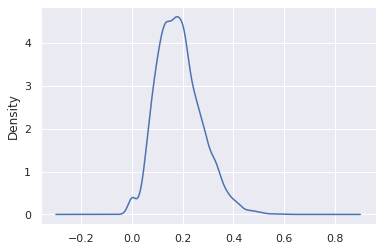

In [25]:
df['KnightMovePercentage_White'].plot.kde()

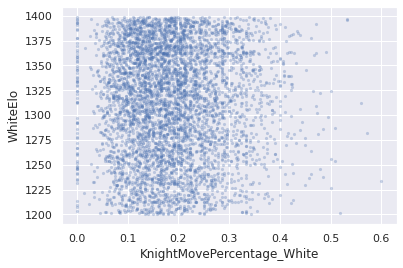

In [27]:
sns.scatterplot(
    x=df['KnightMovePercentage_White'],
    y=df['WhiteElo'],
    alpha=0.3,
    s=10,
    linewidth=0
)

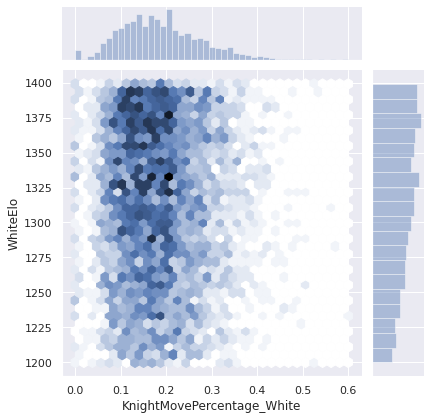

In [120]:
sns.jointplot(
    x=df['KnightMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

In [28]:
df['KnightMovePercentage_White'].describe()

count    4972.000000
mean        0.186107
std         0.087233
min         0.000000
25%         0.123077
50%         0.177215
75%         0.239177
max         0.600000
Name: KnightMovePercentage_White, dtype: float64

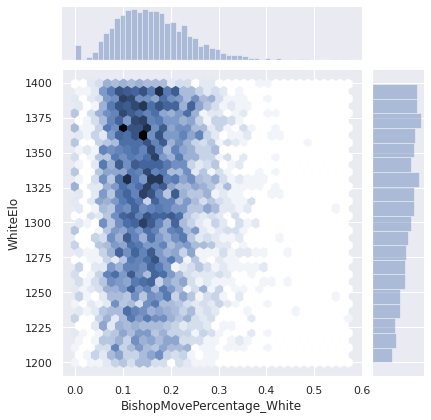

In [121]:
sns.jointplot(
    x=df['BishopMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

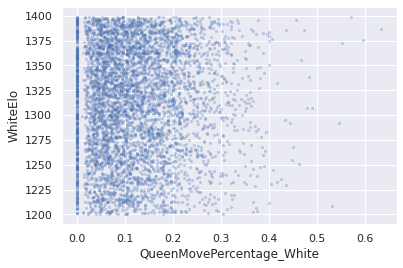

In [32]:
sns.scatterplot(
    x=df['QueenMovePercentage_White'],
    y=df['WhiteElo'],
    alpha=0.3,
    s=10,
    linewidth=0
)

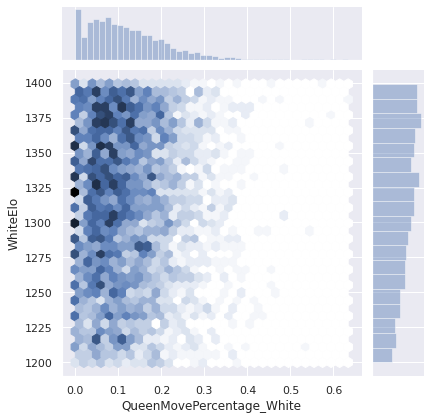

In [31]:
sns.jointplot(
    x=df['QueenMovePercentage_White'],
    y=df['WhiteElo'],
    kind='hex'
)

In [33]:
# let's look at the castling turn
def getCastlingTurn(moves):
    turn = None
    # look for either king side castle or queen side castle
    for index, move in enumerate(moves):
        if move == 'O-O':
            turn = index
        if move == 'O-O-O':
            turn = index
    return turn

In [34]:
df['CastlingTurn_White'] = df['WhiteMoves'].transform(getCastlingTurn)
df['CastlingTurn_Black'] = df['BlackMoves'].transform(getCastlingTurn)

In [35]:
df['CastlingTurn_White'].value_counts()

7.0     514
6.0     501
8.0     456
5.0     364
9.0     361
10.0    307
4.0     255
11.0    246
12.0    206
13.0    194
14.0    141
3.0     121
15.0    112
16.0     78
17.0     74
18.0     47
19.0     46
20.0     37
21.0     23
23.0     19
22.0     18
24.0      9
25.0      7
27.0      5
26.0      4
33.0      3
28.0      2
30.0      1
31.0      1
32.0      1
29.0      1
Name: CastlingTurn_White, dtype: int64

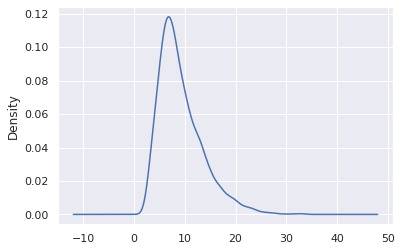

In [36]:
df['CastlingTurn_White'].plot.kde()

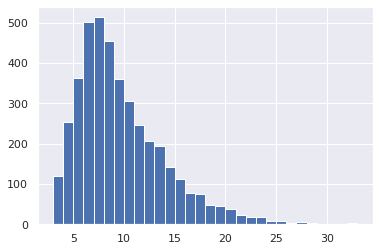

In [37]:
df['CastlingTurn_White'].hist(bins=30)

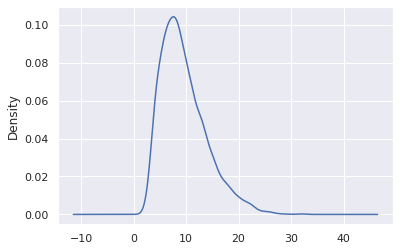

In [38]:
df['CastlingTurn_Black'].plot.kde()

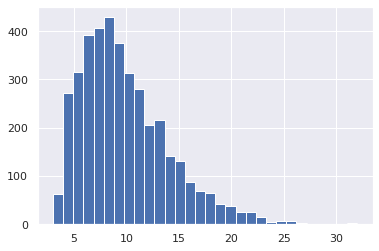

In [39]:
df['CastlingTurn_Black'].hist(bins=30)

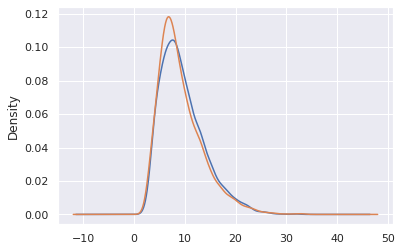

In [40]:
df['CastlingTurn_Black'].plot.kde()
df['CastlingTurn_White'].plot.kde()

In [41]:
# there is almost no difference in the castling turn between white and black

In [42]:
df.columns

Index(['Event', 'Site', 'White', 'Black', 'WhiteElo', 'BlackElo',
       'TimeControl', 'Date', 'ECO', 'PlyCount', 'Result', 'Movements',
       'WhiteMoves', 'BlackMoves', 'PawnMoveCount_White',
       'KnightMoveCount_White', 'BishopMoveCount_White', 'RookMoveCount_White',
       'QueenMoveCount_White', 'KingMoveCount_White', 'TurnCount',
       'PawnMovePercentage_White', 'KnightMovePercentage_White',
       'BishopMovePercentage_White', 'RookMovePercentage_White',
       'QueenMovePercentage_White', 'KingMovePercentage_White',
       'CastlingTurn_White', 'CastlingTurn_Black'],
      dtype='object')

In [46]:
df['Result'].head(20)

0         1-0
1         0-1
2         0-1
3         0-1
4         0-1
5         0-1
6         0-1
7         1-0
8         1-0
9         1-0
10        0-1
11        0-1
12    1/2-1/2
13    1/2-1/2
14        1-0
15        0-1
16        0-1
17        0-1
18        1-0
19        1-0
Name: Result, dtype: object

In [57]:
def getWhiteResult(result):
    '''
    1-0, 0-1, 1/2-1/2 ==> map result to 1 / 0 / 0.5 based on white win, lose, tie
    '''
    determinator = result[:2]
    if determinator == '1-':
        return 1
    if determinator == '0-':
        return 0
    if determinator == '1/':
        return 0.5

In [58]:
df['WhiteResult'] = df['Result'].transform(getWhiteResult)

In [59]:
df['WhiteResult'].head(30)

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     1.0
8     1.0
9     1.0
10    0.0
11    0.0
12    0.5
13    0.5
14    1.0
15    0.0
16    0.0
17    0.0
18    1.0
19    1.0
20    1.0
21    1.0
22    0.0
23    0.5
24    0.0
25    0.0
26    0.5
27    0.0
28    1.0
29    0.5
Name: WhiteResult, dtype: float64

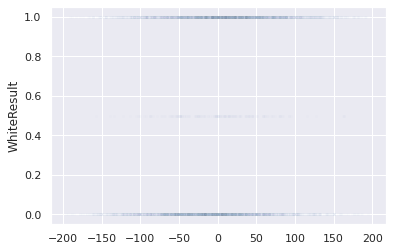

In [65]:
'''
the higher the white's Elo (rating difference) compared to Black's Elo, white was more likely to win
'''
sns.scatterplot(
    x=df['WhiteElo']-df['BlackElo'],
    y=df['WhiteResult'],
    alpha=0.01,
    s=10,
    linewidth=0
)

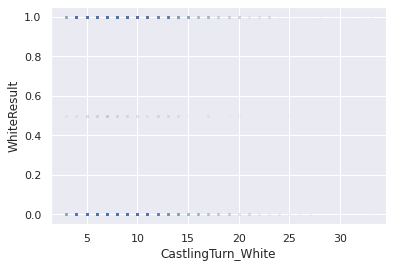

In [68]:
'''
the castling turn doesn't seem to have much impact on the result of the game
'''
sns.scatterplot(
    x=df['CastlingTurn_White'],
    y=df['WhiteResult'],
    alpha=0.01,
    s=10,
    linewidth=0
)

In [82]:
CENTER = ['e4',' e5', 'd4', 'd5']

def getNumberOfMovesIntoTheCenter(moves):
    count = 0
    for move in moves:
        print("move", move)
        position = re.match('([a-z])([0-9])', move)
        print("position", position)
        if position in CENTER:
            count += 1
    return count

In [83]:
df['NumberOfMovesToCenter_White'] = df['WhiteMoves'].transform(getNumberOfMovesIntoTheCenter)

move Qc7
position None
move Kh1
position None
move Qc4
position None
move Rf1
position None
move Qd4
position None
move Nh5
position None
move Qe3
position None
move h4
position <_sre.SRE_Match object; span=(0, 2), match='h4'>
move Qh3
position None
move Qxe6+
position None
move Qxe4
position None
move e4
position <_sre.SRE_Match object; span=(0, 2), match='e4'>
move Nf3
position None
move Bc4
position None
move c3
position <_sre.SRE_Match object; span=(0, 2), match='c3'>
move d4
position <_sre.SRE_Match object; span=(0, 2), match='d4'>
move cxd4
position None
move Nc3
position None
move Bxf7+
position None
move O-O
position None
move Qb3+
position None
move exd5
position None
move dxc6+
position None
move Qxc3
position None
move Ne5+
position None
move cxb7
position None
move Nc6
position None
move Nxb8
position None
move Qxc7
position None
move Qg3
position None
move Qe3
position None
move Bd2
position None
move Rac1
position None
move Qg3
position None
move Bxg5
position None
move Q

KeyboardInterrupt: 

In [75]:
df['NumberOfMovesToCenter_White'].head(20)

0     1
1     1
2     1
3     1
4     3
5     2
6     2
7     2
8     2
9     3
10    2
11    2
12    1
13    3
14    3
15    3
16    1
17    3
18    3
19    2
Name: NumberOfMovesToCenter_White, dtype: int64